In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import WeibullAFTFitter
import japanize_matplotlib 


import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_excel("../data/data_covid_fix_name.xlsx")

In [3]:
df

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
0,Albania,2866376,60.319,13364.155397,6.996524e+06,7.84,8.005411,7.67,70,74.3,1,108641,303.14
1,Algeria,42228429,72.629,15481.787620,9.108277e+06,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
2,Angola,30809762,65.514,6452.355165,1.049012e+07,5.40,5.979936,4.83,83,17.9,1,303691,76.94
3,Argentina,44494502,91.870,20610.568550,1.902562e+07,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
4,Armenia,2951776,63.149,10343.175590,5.064044e+06,7.42,7.145017,7.70,62,60.8,1,86276,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Venezuela,28870195,88.208,18102.500000,1.505807e+07,3.80,5.027017,2.58,76,8.7,1,153747,2137.77
151,Vietnam,95540395,35.919,7447.814334,2.220676e+06,6.29,6.310973,6.27,25,57.4,1,896,47049.67
152,Yemen,28498687,36.642,2575.126385,5.972543e+06,4.30,2.750150,5.84,102,9.0,1,1557188,336.31
153,Zambia,17351822,43.521,4223.906936,9.685537e+06,6.49,6.133478,6.84,80,21.9,1,211995,8.90


Text(0.5, 1.0, '中国で感染が起きてから各国で感染が起きるまでの日数の分布')

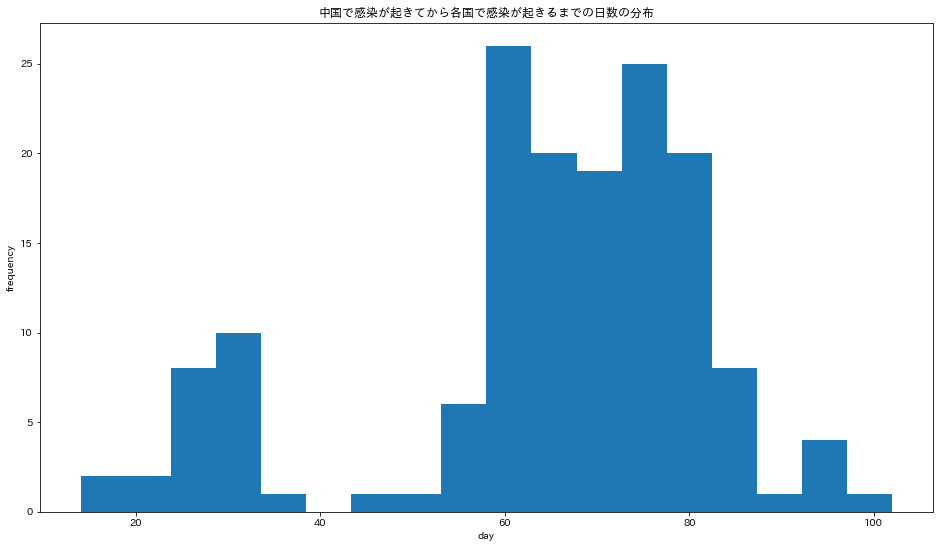

In [10]:
plt.figure(figsize=(16, 9))
plt.hist(df["date_first"],  bins=18)
plt.xlabel("day")
plt.ylabel("frequency")
plt.title("中国で感染が起きてから各国で感染が起きるまでの日数の分布")

In [6]:
df.columns

Index(['country', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'date_first',
       'detection', 'status', 'cumul', 'air'],
      dtype='object')

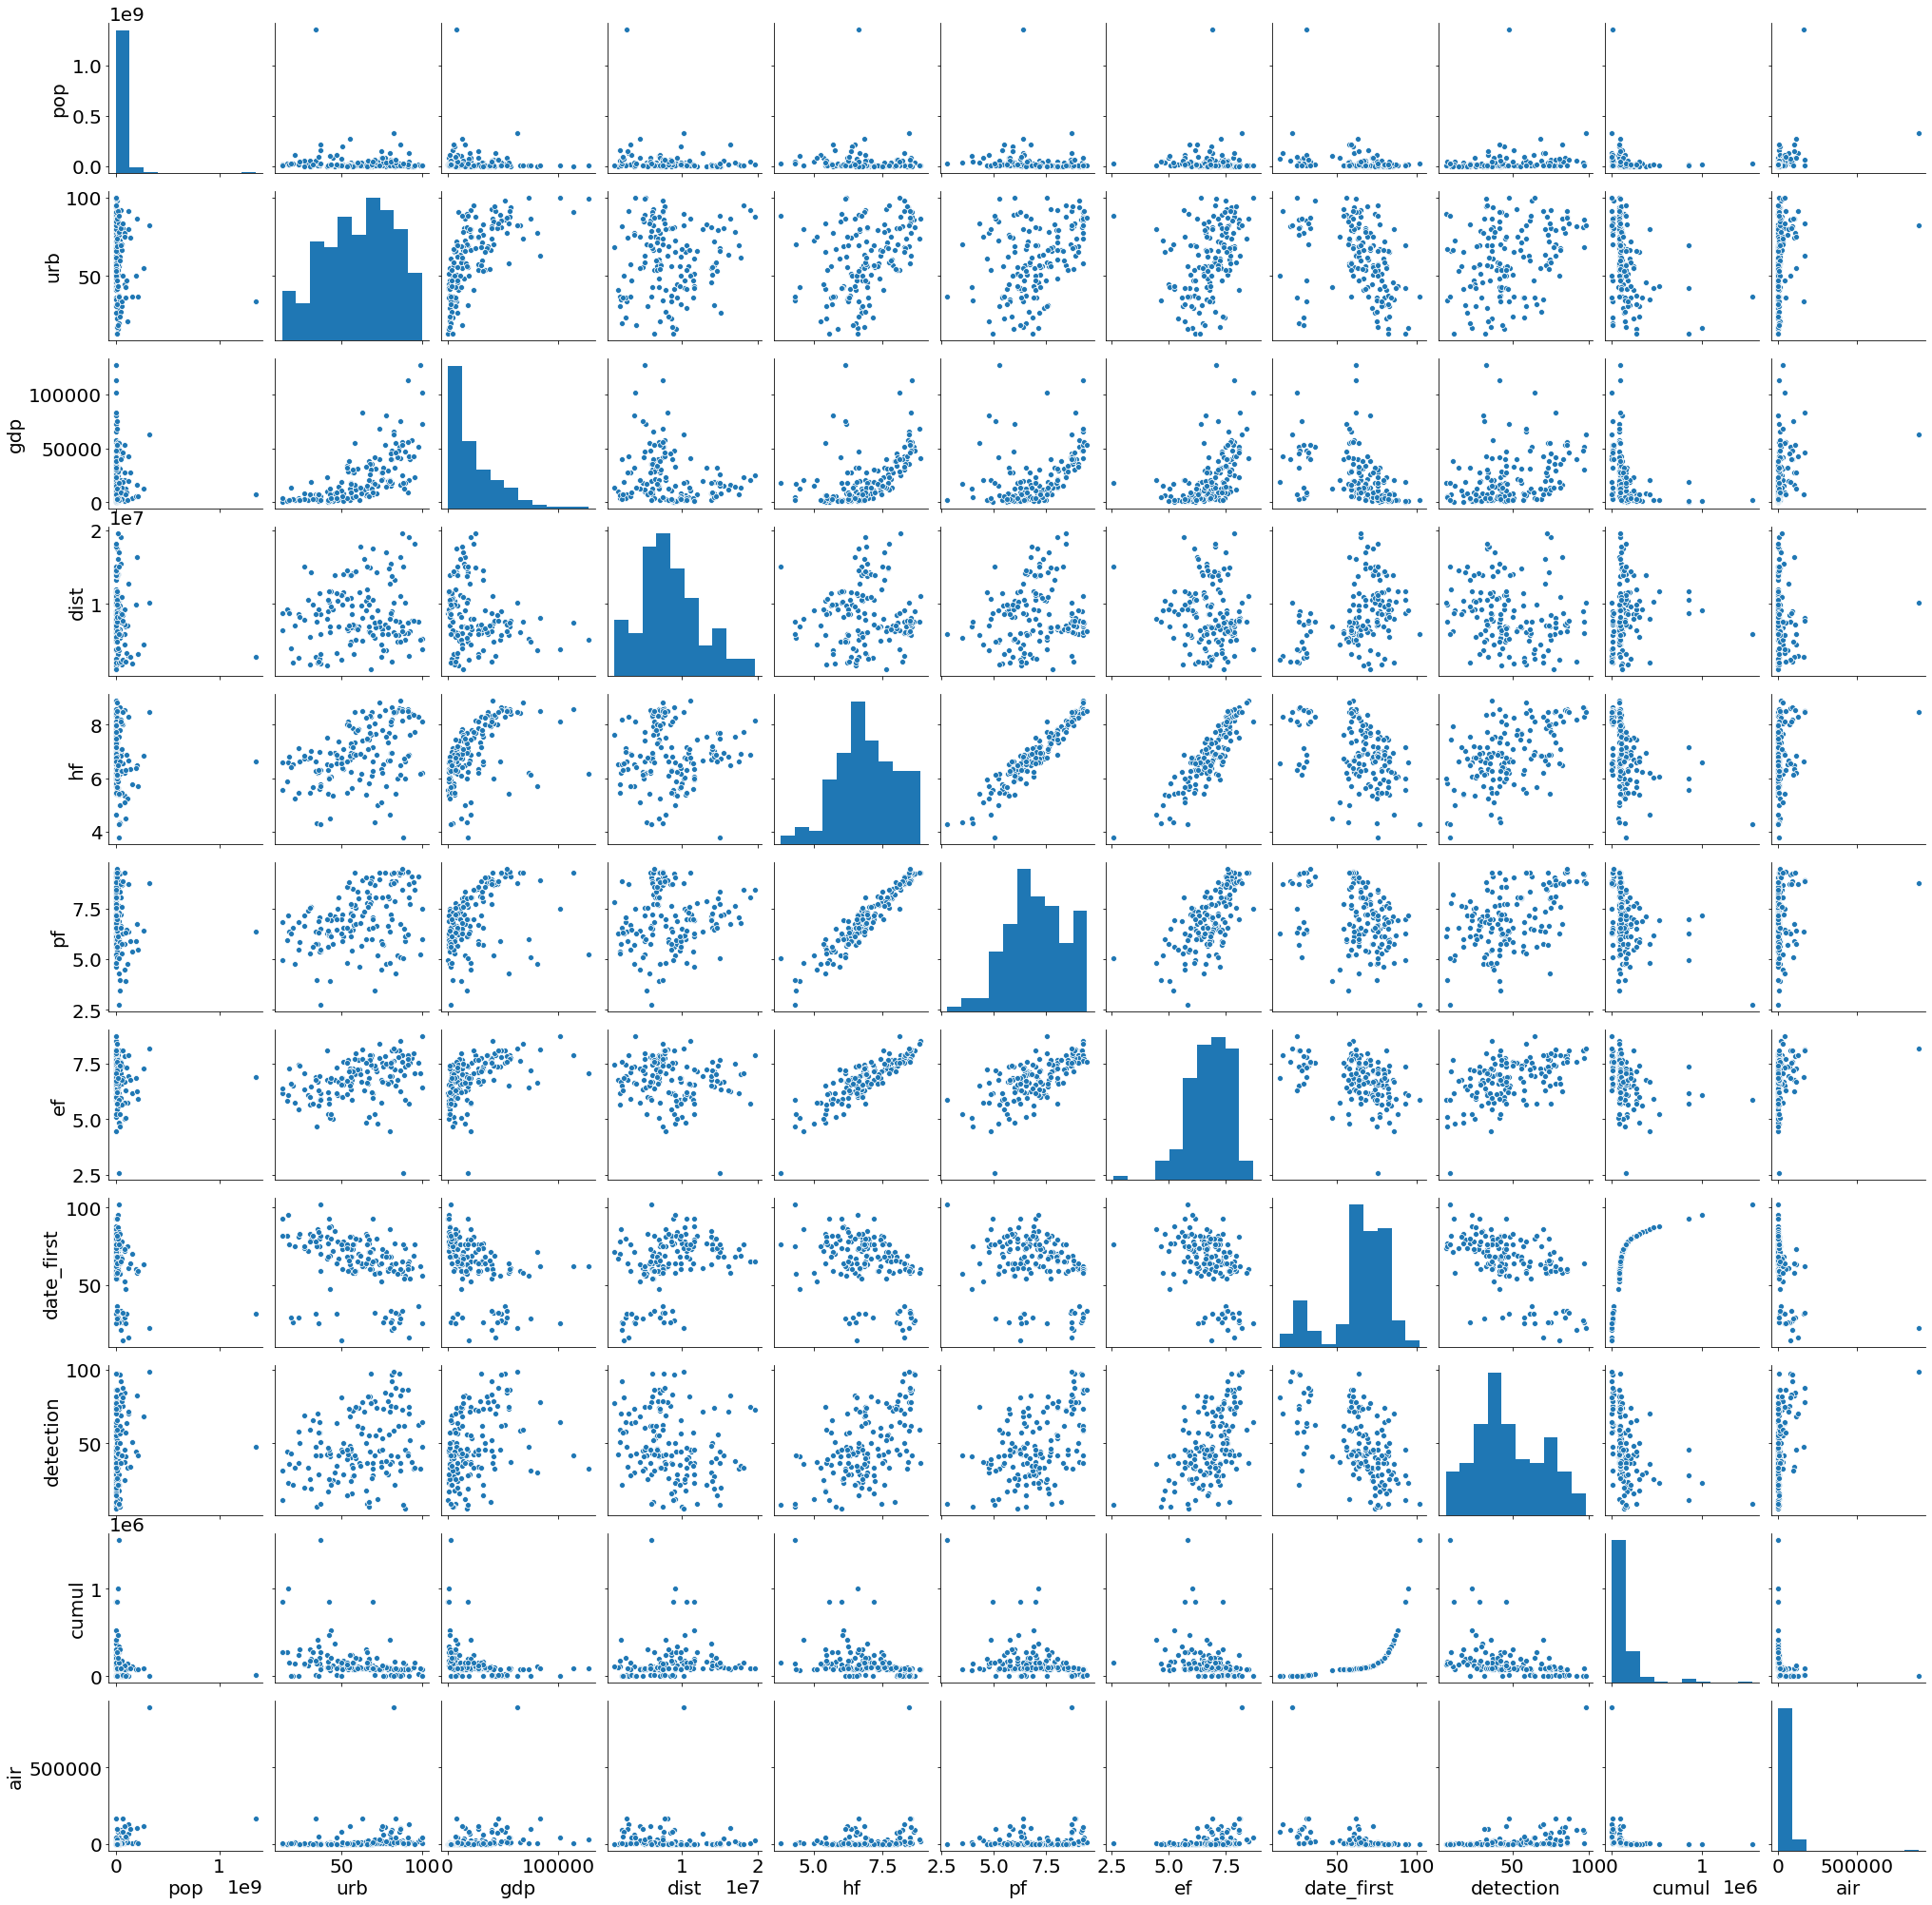

'line_plot = sns.lineplot()\nfigure = line_plot.get_figure()\nfigure.savefig(save_path)'

In [8]:
plt.rcParams["font.size"] = 20
sns.pairplot(data=df[['pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'date_first', 'detection','cumul', 'air']], palette='Blues')
#sns.pairplot(data=df[['pop', 'urb']], palette='Blues')
plt.savefig("correlation_matrix.png")
plt.show()

"""line_plot = sns.lineplot()
figure = line_plot.get_figure()
figure.savefig(save_path)"""

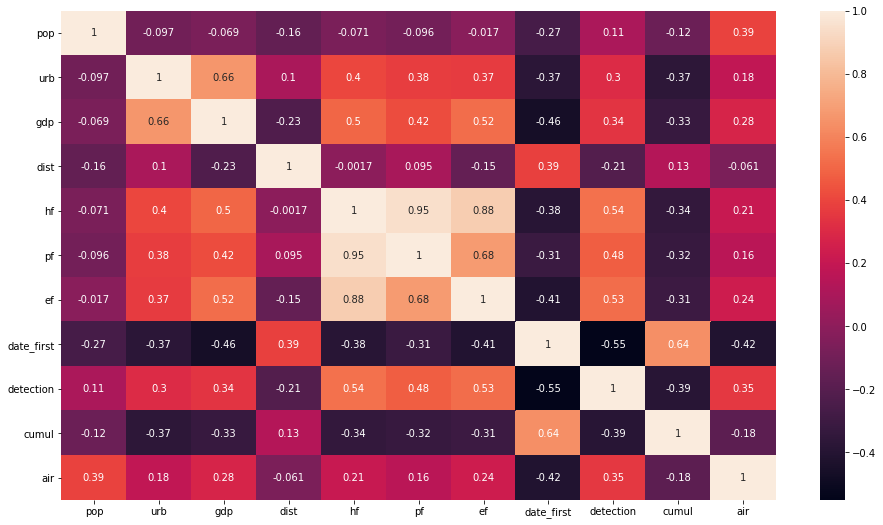

In [21]:
# 相関行列のヒートマップを描く
data=df[['pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'date_first', 'detection','cumul', 'air']]
corr = data.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.savefig("correlation_heatmap.png")

In [16]:
corr = data.corr()

In [18]:
corr.columns

Index(['pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'date_first',
       'detection', 'cumul', 'air'],
      dtype='object')

In [41]:
df[['pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef']].describe()

,pop,urb,gdp,dist,hf,pf,ef
count,1.550000e+02,155.000000,155.000000,1.550000e+02,155.000000,155.000000,155.000000
mean,3.858472e+07,60.917374,22814.730123,8.475606e+06,6.903032,7.005173,6.800968
std,1.174546e+08,21.949313,23136.831253,4.016598e+06,1.076712,1.418303,0.921882
min,9.676200e+04,13.032000,744.182072,1.141837e+06,3.800000,2.750150,2.580000
25%,4.113354e+06,43.440500,5550.303336,5.972667e+06,6.230000,6.041367,6.205000
50%,1.062716e+07,62.453000,15012.930268,7.695516e+06,6.840000,6.971812,6.890000
75%,3.284460e+07,79.721000,32751.583528,1.064470e+07,7.740000,8.042474,7.500000
max,1.352617e+09,100.000000,126898.425932,1.957707e+07,8.880000,9.445978,8.710000


In [42]:
df[['date_first','detection', 'cumul', 'air']].describe()

,date_first,detection,cumul,air
count,155.000000,155.000000,1.550000e+02,150.000000
mean,64.200000,48.008387,1.506510e+05,23811.039000
std,18.175337,22.199219,1.904942e+05,79306.068554
min,14.000000,6.100000,6.000000e+01,0.900000
25%,59.000000,33.200000,8.136300e+04,404.055000
50%,68.000000,44.400000,1.011220e+05,2271.125000
75%,76.000000,64.600000,1.537470e+05,13258.467500
max,102.000000,98.200000,1.557188e+06,889022.000000


# P値の計算

In [4]:
from scipy import stats
import numpy as np

In [5]:
n=150
p=9

t = 2.46/0.79             # t統計量
P = (1 - stats.t.cdf(np.abs(t), n - p - 1)) * 2  

In [6]:
P

0.0022393251149739335